<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

In [ ]:
!pip install tensorflow

# Explanation:
## Building the Model:

Use the Sequential API to stack layers sequentially.
The Flatten layer reshapes the input data from 2D to 1D.
The Dense layer with 128 units and ReLU activation captures complex patterns in the data.
The Dropout layer helps in regularization to avoid overfitting.
The final Dense layer with 10 units and softmax activation outputs class probabilities.
Compiling the Model:

optimizer='adam' uses the Adam optimization algorithm.
loss='sparse_categorical_crossentropy' is used for integer-labeled multi-class classification.
metrics=['accuracy'] tracks the accuracy of the model during training and evaluation.
Loading and Preparing Data:

The MNIST dataset is loaded using tf.keras.datasets.mnist.load_data().
Data is normalized by scaling pixel values to the range [0, 1].
Training the Model:

The model is trained using the fit method, with training data and validation data provided.
The number of epochs is set to 10.
Viewing the Training History:

The history object returned by model.fit() contains information about the training process, including loss and accuracy for each epoch.
This setup is typical for classifying handwritten digits in the MNIST dataset. If you have specific requirements or additional questions, feel free to ask!








In [5]:
# load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train,y_train = x_train / 255.0, x_test /255.0
print("x_train.shape:" , x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [6]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
 ])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2945 - accuracy: 0.9145 - val_loss: 0.1412 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1437 - accuracy: 0.9581 - val_loss: 0.1029 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1087 - accuracy: 0.9675 - val_loss: 0.0806 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0744 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9755 - val_loss: 0.0737 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.0638 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0646 - val_accu

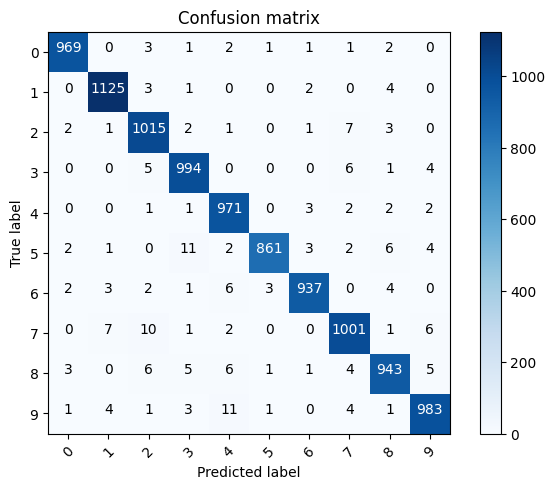

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define the function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load the dataset (for example, MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# View the training history
print(r.history)

# Predict the labels for the test data
p_test = model.predict(x_test).argmax(axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, p_test)

# Plot the confusion matrix
plot_confusion_matrix(cm, list(range(10)))


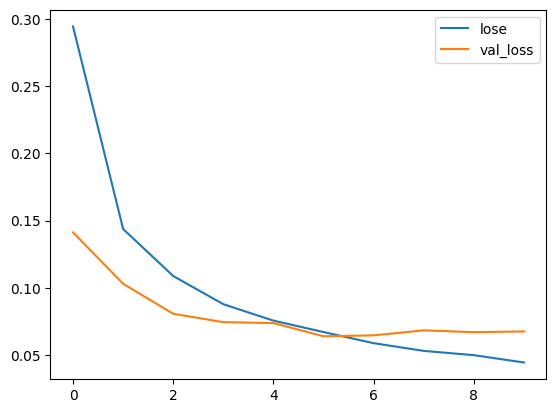

In [11]:
import matplotlib.pyplot as plt
# Plot loss per iteration
plt.plot(r.history['loss'], label='lose')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

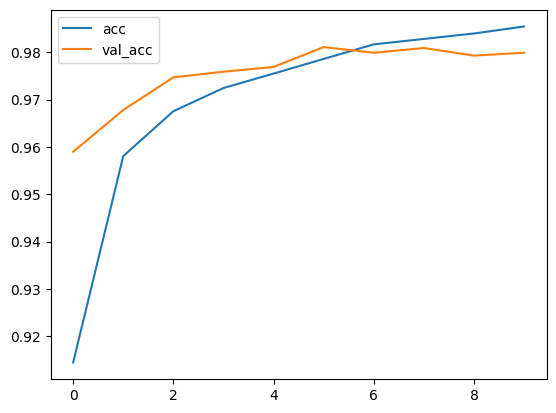

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
#Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9799
[0.0674603059887886, 0.9799000024795532]


In [14]:

# Summarize the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Explanation:
Identifying Misclassified Indices:

misclassified_idx is computed using np.where(p_test != y_test)[0], which returns the indices of the misclassified samples.
Plotting Misclassified Examples:

We use plt.figure to create a new figure.
We plot a few randomly selected misclassified examples (num_examples = 5 in this case) using np.random.choice(misclassified_idx).
For each selected misclassified example, we plot the image and display the true and predicted labels in the title.
This addition will allow you to visually inspect some of the misclassified examples, which can help in understanding the types of errors the model is making.

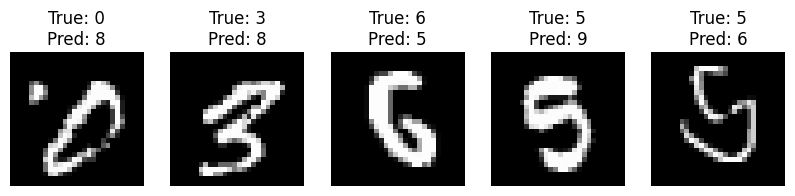

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]

# Plot a few misclassified examples
num_examples = 5
plt.figure(figsize=(10, 10))

for i in range(num_examples):
    idx = np.random.choice(misclassified_idx)
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title("True: %s\nPred: %s" % (y_test[idx], p_test[idx]))
    plt.axis('off')

plt.show()